In [1]:
# Data set from Yahoo Fiance- Starbucks Feb 2019 - Jan 2024

In [2]:
# Importing

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import math

In [5]:
st_df = pd.read_csv('/content/SBUX (2).csv')

In [6]:
st_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-11,70.000000,70.470001,69.849998,69.989998,63.300541,9229700
1,2019-02-12,70.239998,70.459999,69.709999,69.750000,63.083492,8848900
2,2019-02-13,69.809998,70.599998,69.800003,70.510002,63.770844,10264000
3,2019-02-14,70.129997,71.540001,69.970001,70.839996,64.069290,9441100
4,2019-02-15,71.150002,71.370003,70.190002,70.709999,63.951721,13924600


In [8]:
st_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1232,2024-01-03,93.959999,94.239998,93.059998,93.230003,92.672440,7161700
1233,2024-01-04,93.099998,94.580002,93.000000,93.550003,92.990524,7118600
1234,2024-01-05,93.330002,93.580002,92.480003,92.989998,92.433868,7189900
1235,2024-01-08,93.019997,94.570000,92.949997,94.190002,93.626701,7536900
1236,2024-01-09,93.610001,93.730003,92.860001,93.089996,92.533272,6348500


In [9]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1237 non-null   object 
 1   Open       1237 non-null   float64
 2   High       1237 non-null   float64
 3   Low        1237 non-null   float64
 4   Close      1237 non-null   float64
 5   Adj Close  1237 non-null   float64
 6   Volume     1237 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.8+ KB


In [13]:
st_df['Date'] = pd.to_datetime(st_df['Date'])
st_df.set_index('Date', inplace=True)
st_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2019-02-11 to 2024-01-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1237 non-null   float64
 1   High       1237 non-null   float64
 2   Low        1237 non-null   float64
 3   Close      1237 non-null   float64
 4   Adj Close  1237 non-null   float64
 5   Volume     1237 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.6 KB


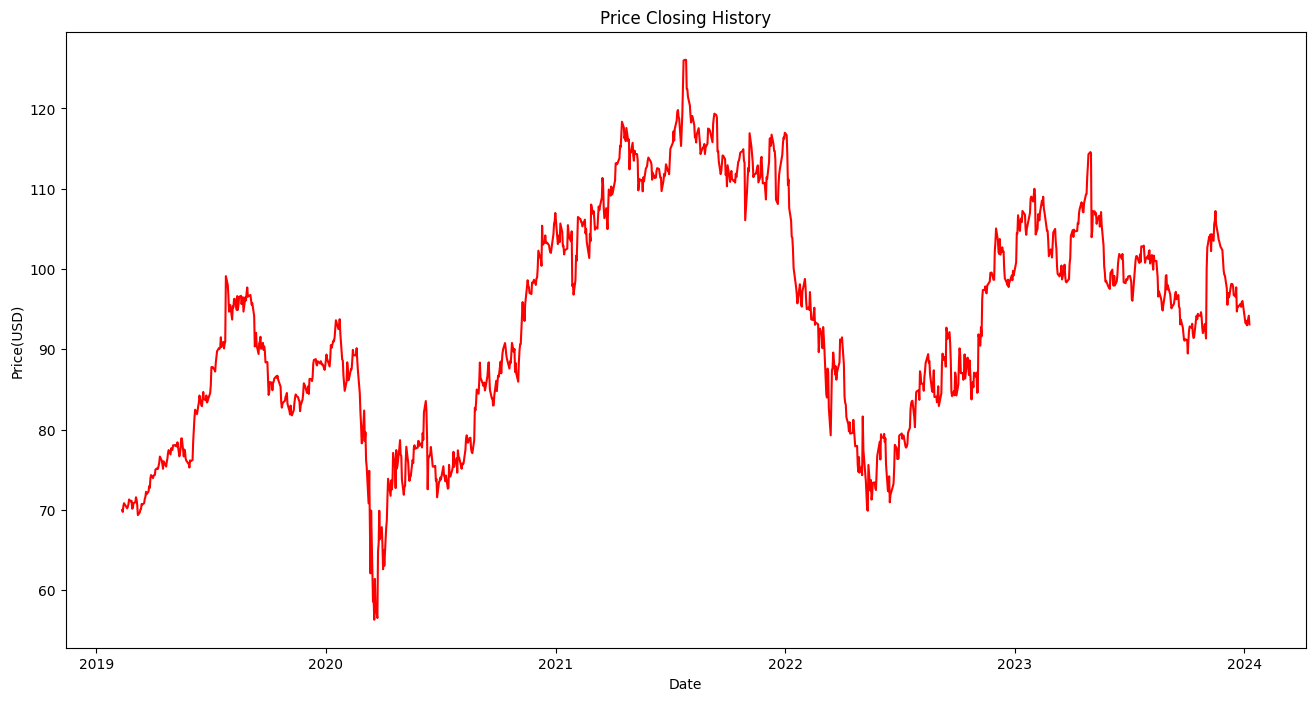

In [14]:
plt.figure(figsize=(16,8))
plt.plot(st_df['Close'], color='red')
plt.title('Price Closing History')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.show()

In [35]:
st_data = st_df.filter(['Close'])
st_dataset = st_data.values
training_data = int(np.ceil(len(st_dataset) *.95))
print(training_data)

1176


In [27]:
st_scale = MinMaxScaler(feature_range=(0,1))
st_scaled_data = st_scale.fit_transform(st_dataset)
print(st_scaled_data)

[[0.19589842]
 [0.1924566 ]
 [0.20335581]
 ...
 [0.52574212]
 [0.54295142]
 [0.5271762 ]]


In [29]:
data_train = st_scaled_data[0:training_data, :]
X_train = []
y_train = []
for i in range(60, len(data_train)):
  X_train.append(data_train[i-60:i, 0])
  y_train.append(data_train[i,0])
  if i<=60:
    print(X_train)
    print(y_train)

[array([0.19589842, 0.1924566 , 0.20335581, 0.20808827, 0.20622398,
       0.19891002, 0.20163485, 0.20608054, 0.21468524, 0.21109998,
       0.21239062, 0.19819304, 0.19977055, 0.20823171, 0.20966579,
       0.21870072, 0.21425492, 0.2047899 , 0.18686361, 0.19145273,
       0.19675895, 0.19747593, 0.20665419, 0.20565032, 0.20808827,
       0.21583244, 0.2194177 , 0.22845262, 0.22415026, 0.22902627,
       0.23849129, 0.23533625, 0.25283232, 0.25828187, 0.25283232,
       0.25727802, 0.25813855, 0.25842531, 0.26817723, 0.27061517,
       0.26946798, 0.27463075, 0.28022375, 0.29140974, 0.28438266,
       0.27778569, 0.26946798, 0.28294847, 0.27348345, 0.2819446 ,
       0.28768103, 0.2980066 , 0.30288249, 0.29513844, 0.30618097,
       0.30388636, 0.30316937, 0.3114872 , 0.31163054, 0.31019645])]
[0.3114871969876494]


In [30]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [32]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
print(X_train.shape)

(930, 60, 1)


In [33]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7c01e4ba3100>>

In [34]:
model.compile(optimizer='Adam',
              loss='mean_squared_error')
history = model.fit(X_train,
                    y_train,
                    epochs=10)

Epoch 1/10
30/30 [==============================] - 4s 34ms/step - loss: 0.0557
Epoch 2/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0169
Epoch 3/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0149
Epoch 4/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0166
Epoch 5/10
30/30 [==============================] - 1s 47ms/step - loss: 0.0125
Epoch 6/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0134
Epoch 7/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0121
Epoch 8/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0124
Epoch 9/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0104
Epoch 10/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0104


In [38]:
test_data = st_scaled_data[training_data-60:, :]
X_test = []
y_test = st_dataset[training_data:, :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i,0])

In [42]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [43]:
pred = model.predict(X_test)
pred = st_scale.inverse_transform(pred)
met = np.mean(((pred - y_test) ** 2))
print(met, ":MSE")
print(np.sqrt(met), ":RMSE")

1/1 [==============================] - 1s 941ms/step
52.088026530378414 :MSE
7.217203511775071 :RMSE


In [52]:
train = st_data[:training_data]
valid = st_data[training_data:]

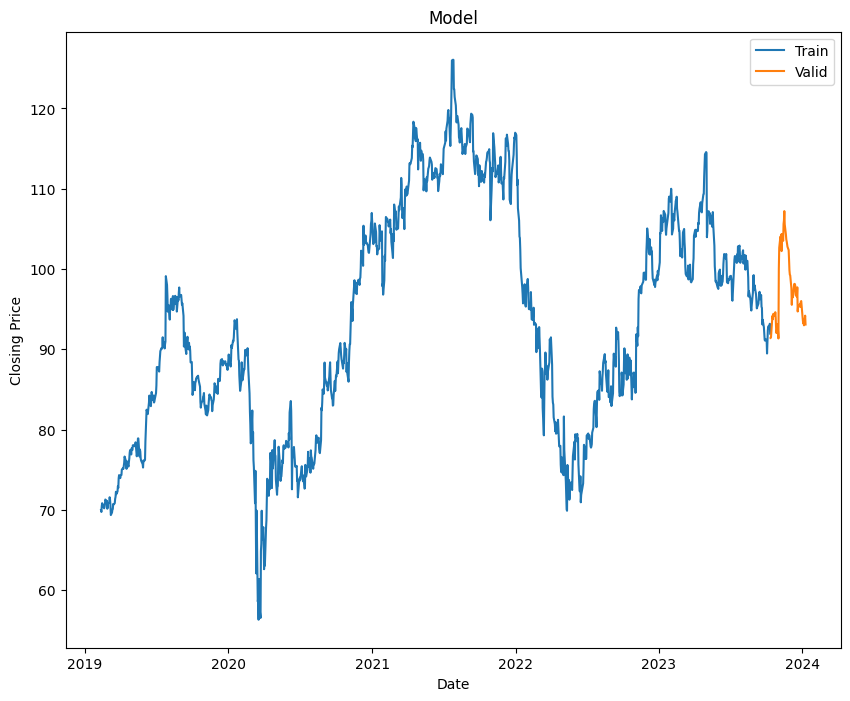

In [59]:
plt.figure(figsize=(10,8))
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Model')
plt.legend(['Train','Valid','Predictions'])